<a href="https://colab.research.google.com/github/joyangelai/Customer-Churn-Prediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
#Loading the dataset
data=pd.read_csv('/content/churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# viewing the last five columns of the dataset
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
# checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# checking summary statistics
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#checking the shape
data.shape

(10000, 14)

In [7]:
#Creating a copy of the data
data1 = data.copy(deep=True)

In [8]:
data1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Cleaning & EDA**

In [9]:
#Checking unique values in each column using for loop
for column in data1:
    unique_values= data1[column].unique()
    print(f"Unique values in {column} '\n': {unique_values}")


Unique values in RowNumber '
': [    1     2     3 ...  9998  9999 10000]
Unique values in CustomerId '
': [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Unique values in Surname '
': ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Unique values in CreditScore '
': [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 65

In [10]:
#Checking columns
data1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
#Checking missing values
data1.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [12]:
#Checking duplicates
data1.duplicated().sum()

np.int64(0)

In [13]:
# dropping unnecessary columns because we don't need them
data1 = data1.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
data1.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6605,771,Spain,Female,33,5,0.0,2,1,0,8673.43,0


In [14]:
#Checking for outliers
numeric_cols = data1.select_dtypes(include=['int64','float64']).columns

# Looping through numeric columns and check the outliers
for col in numeric_cols:
  Q3 = data1[col].quantile(0.75)
  Q1 = data1[col].quantile(0.25)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data1[(data1[col] < lower_bound) | (data1[col] > upper_bound)]
  print(f"{col}: {len(outliers)} outliers")
  print(f"Outlier values: {outliers[col].unique()}")

CreditScore: 15 outliers
Outlier values: [376 363 359 350 358 351 365 367 382 373]
Age: 359 outliers
Outlier values: [66 75 65 73 72 67 79 80 68 70 63 64 82 69 74 71 76 77 88 85 84 78 81 92
 83]
Tenure: 0 outliers
Outlier values: []
Balance: 0 outliers
Outlier values: []
NumOfProducts: 60 outliers
Outlier values: [4]
HasCrCard: 0 outliers
Outlier values: []
IsActiveMember: 0 outliers
Outlier values: []
EstimatedSalary: 0 outliers
Outlier values: []
Exited: 2037 outliers
Outlier values: [1]


'CreditScore' values seem very low but are still realistic. The best removal method is capping them.

'Age' and 'NumOfProducts' values seem realistic enough since an age range of 63-92 is just statistically rare but isn't because of wrong input. No need for outlier removal. For number of products, value 4 was flagged but legit. Customers with 4 products might be of high-value or loyal.

Since 'Exited' is our target variable which is already binary encoded, it is not advisable to remove outliers from it.'Exited' might be hinting at class imbalance since 1 is being displayed as an outlier value indicating that it may be a minority class from the dataset.

In [15]:
# Create a copy of the dataset
data2 = data1.copy(deep=True)

# Handling outliers by removing them
q1 = data2['CreditScore'].quantile(0.25)
q3 = data2['CreditScore'].quantile(0.75)
iqr = q3 - q1

low_bd = q1 - 1.5 * iqr
upp_bd = q3 + 1.5 * iqr

before_max = data2['CreditScore'].max()
before_min = data2['CreditScore'].min()

data2['CreditScore'] = data2['CreditScore'].clip(lower=low_bd, upper= upp_bd)

after_max = data2['CreditScore'].max()
after_min = data2['CreditScore'].min()

print(f"CreditScore \n Capped min : Before{before_min:.2f} --> After{after_min:.2f} \n Capped max: Before: {before_max:.2f} --> After: {after_max:.2f}")


CreditScore 
 Capped min : Before350.00 --> After383.00 
 Capped max: Before: 850.00 --> After: 850.00


The value for 350 was raised to 383 reducing the influence of low credit scores.

In [16]:
# final data shape
data2.shape

(10000, 11)

In [17]:
# Confirm if there are any missing values
data2.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


# **EDA**

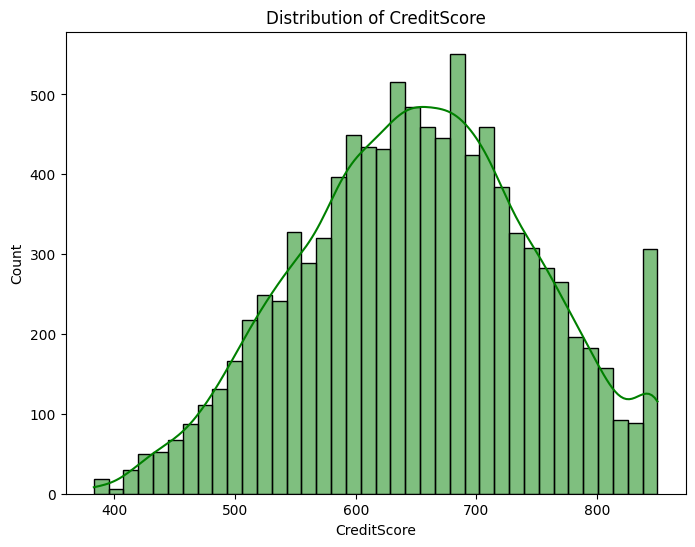

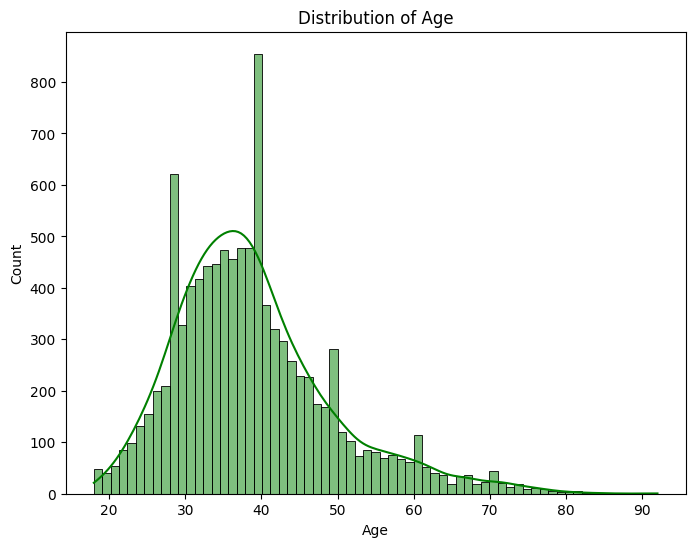

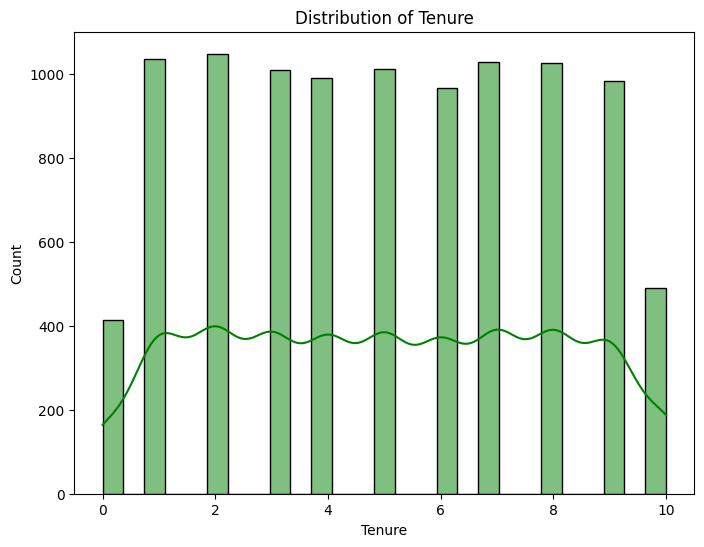

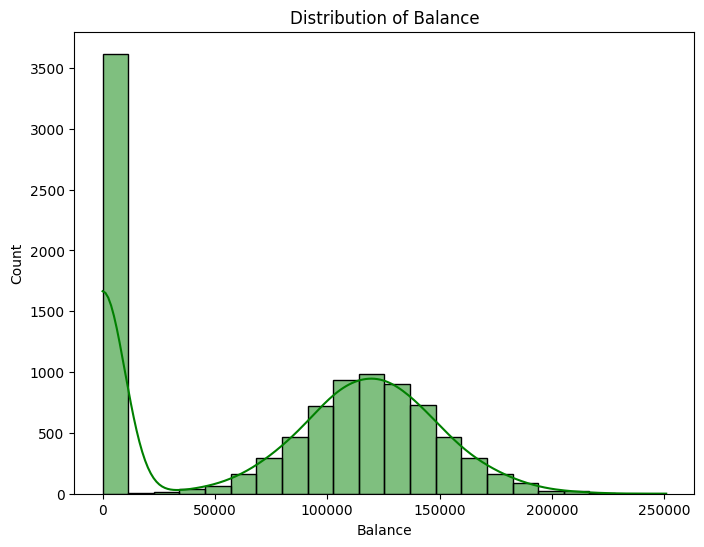

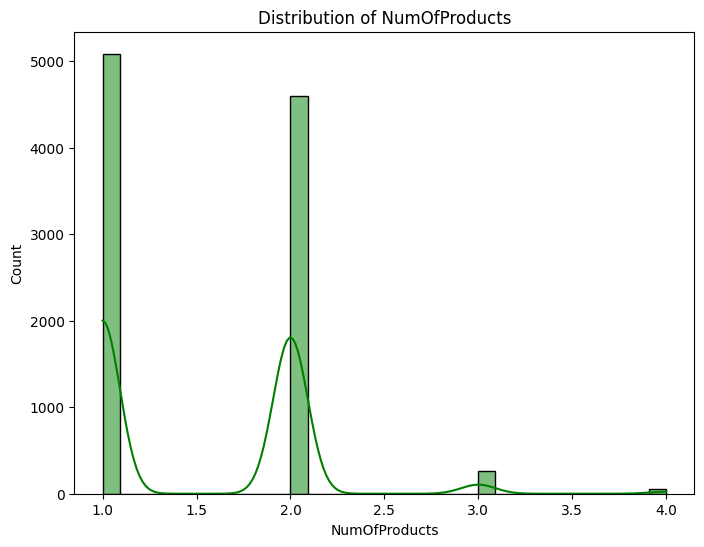

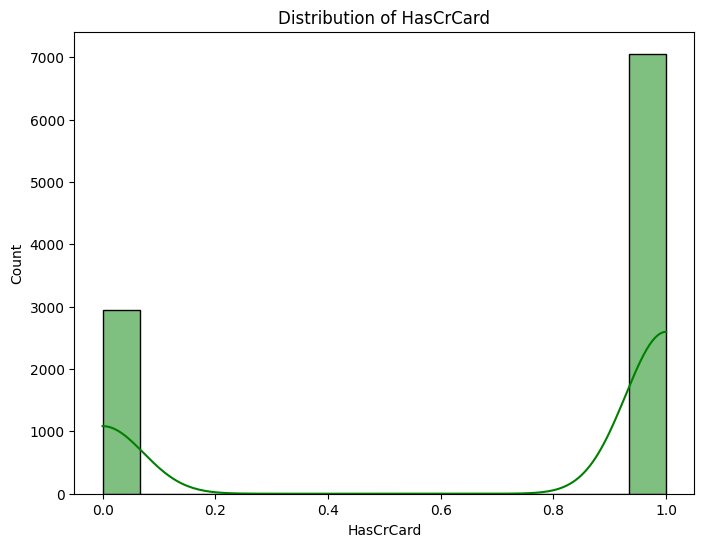

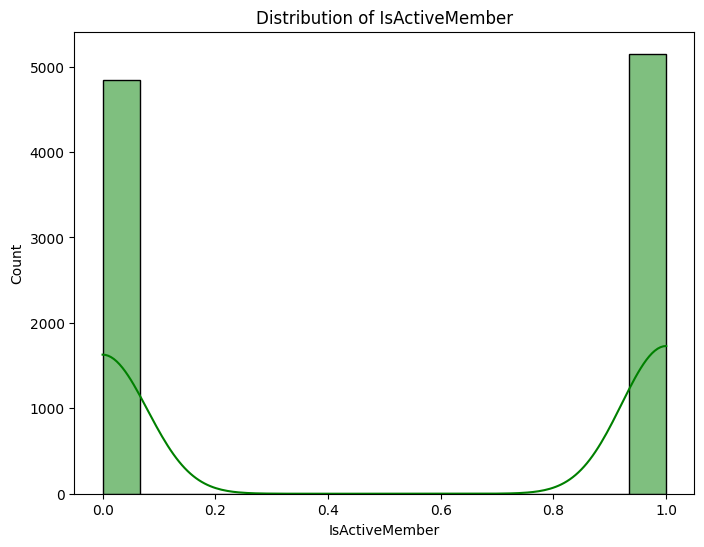

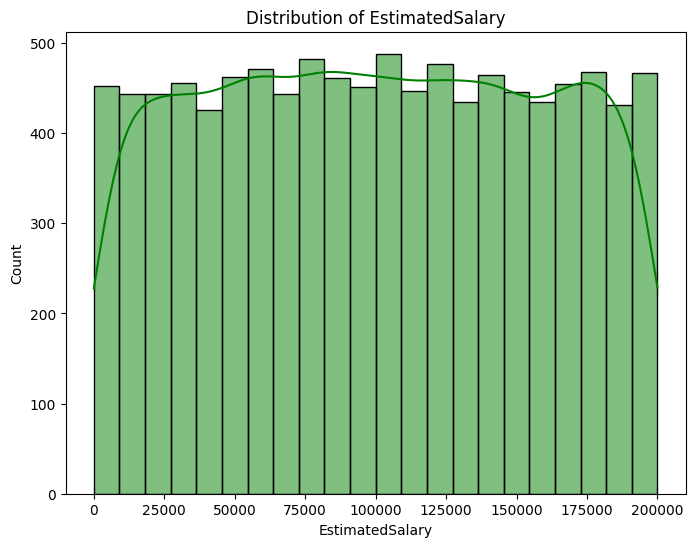

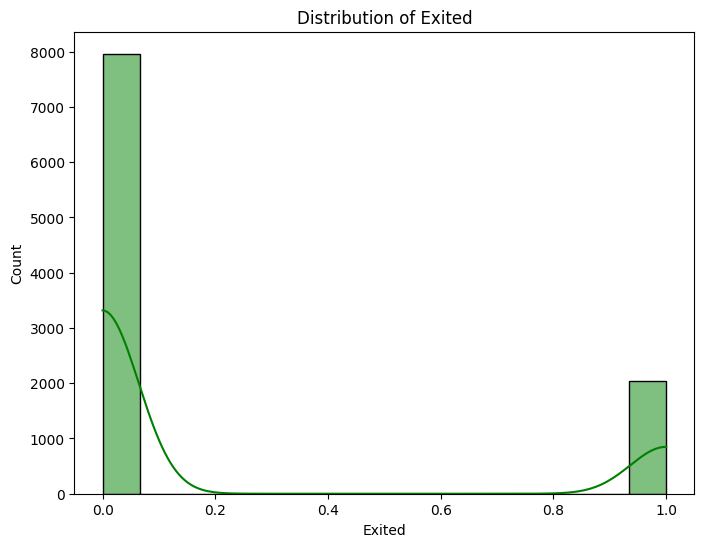

In [18]:
# Checking for residual outliers & Univariate analysis on numerical variables
num_cols = data2.select_dtypes(include=['int64','float64']).columns
for cols in num_cols:
  plt.figure(figsize=(8,6))
  sns.histplot(data2[cols], kde=True, color='g')
  plt.title(f"Distribution of {cols}");


Everything is fine

## Observations


1. CreditScore is slightly left skewed with most values concentrating around 600 - 700. This may suggest that low credit scores may represent a riskier segment of customers churning.
2. Age distribution is right skewed. Most values ranging from 30-50. This suggests that older customers have a higher risk of churning.
3. Balance is normally distributed with most values concentrating at the mean suggesting that the values are well-balanced.
4. Tenure and Estimated Salary have uniform distribution. Values are evenly spread across the range. This indicates that these variables may not provide strong predictive power because the outcomes are equally likely.

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


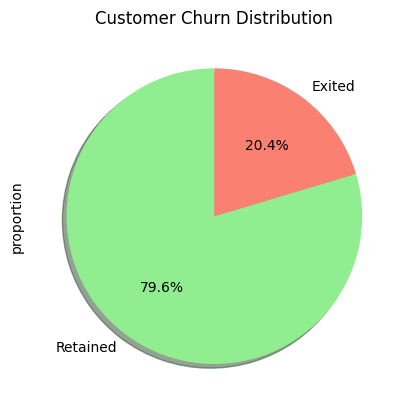

In [19]:
# Checking the proportion of exiting customers
table =data2['Exited'].value_counts(normalize=True)
print(table)
table.plot(kind='pie', autopct= '%1.1f%%', labels=['Retained', 'Exited'], colors=['lightgreen','salmon'], startangle= 90, shadow=True)
plt.title("Customer Churn Distribution");

79.6% of the customers have a higher likelihood of staying in the bank while 20.4% of the customers are likely to churn.

HasCrCard
1    0.7055
0    0.2945
Name: proportion, dtype: float64


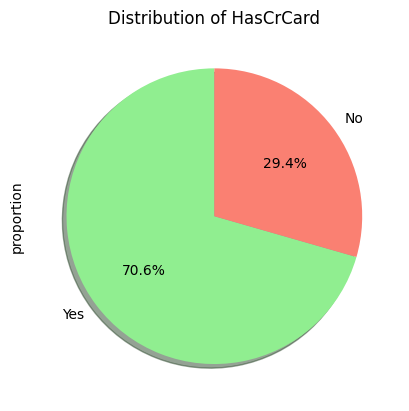

In [20]:
# Checking the proportion of customers with credit cards
table1 = data2['HasCrCard'].value_counts(normalize=True)
print(table1)
table1.plot(kind='pie', autopct= '%1.1f%%', labels=['Yes', 'No'], colors=['lightgreen','salmon'], startangle= 90, shadow=True)
plt.title("Distribution of HasCrCard");

Majority of the customers have credit cards.

IsActiveMember
1    0.5151
0    0.4849
Name: proportion, dtype: float64


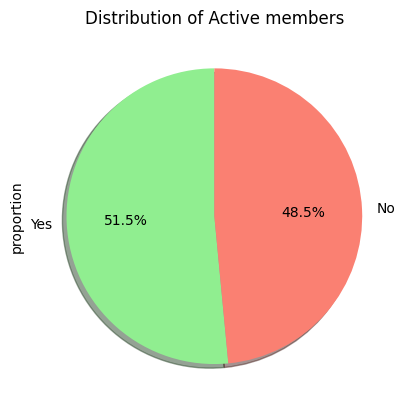

In [21]:
# Checking the proportion of active customers
table2 = data2['IsActiveMember'].value_counts(normalize=True)
print(table2)
table2.plot(kind='pie', autopct= '%1.1f%%', labels=['Yes', 'No'], colors=['lightgreen','salmon'], startangle= 90, shadow=True)
plt.title("Distribution of Active members");

Active members have almost equal distribution.

In [22]:
data2.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

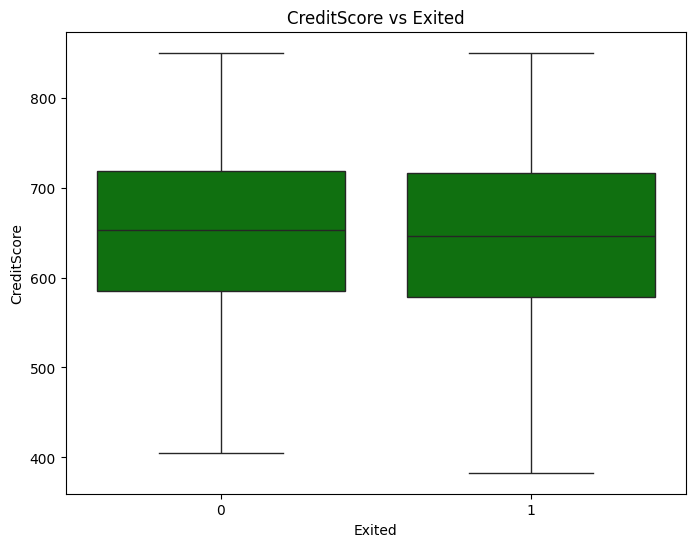

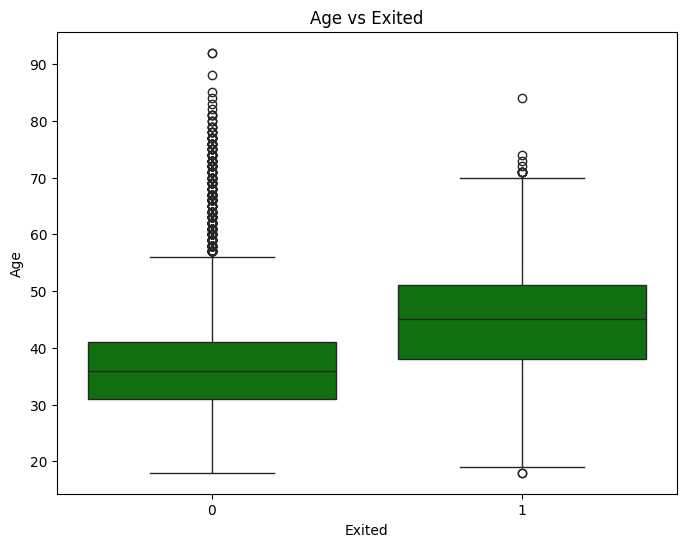

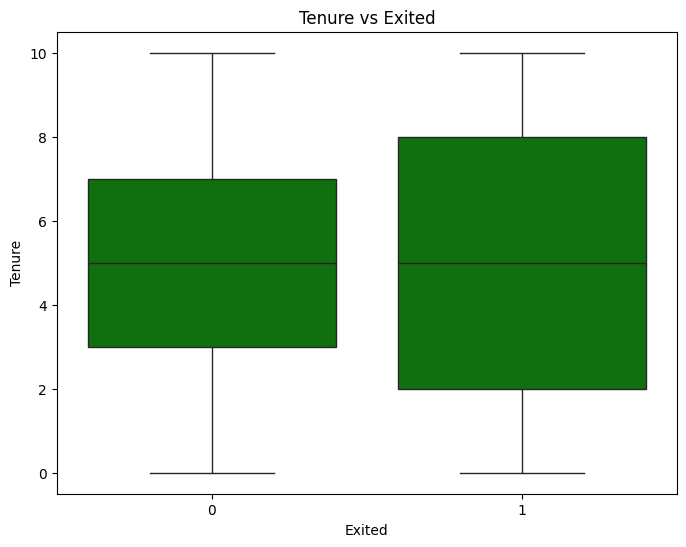

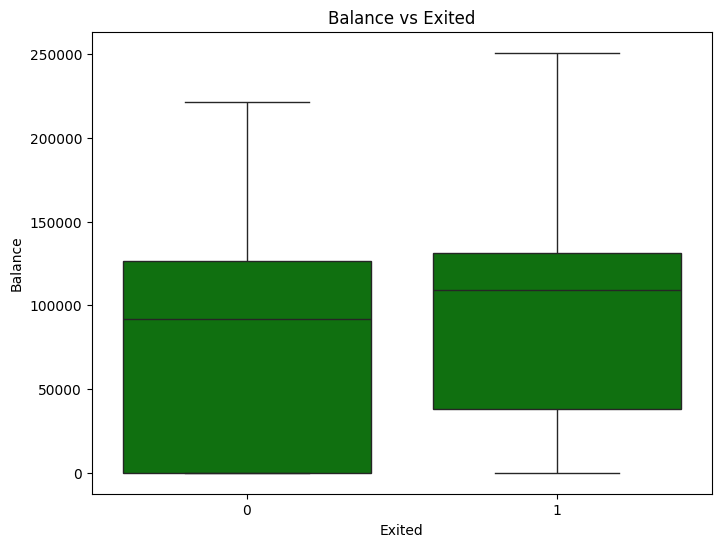

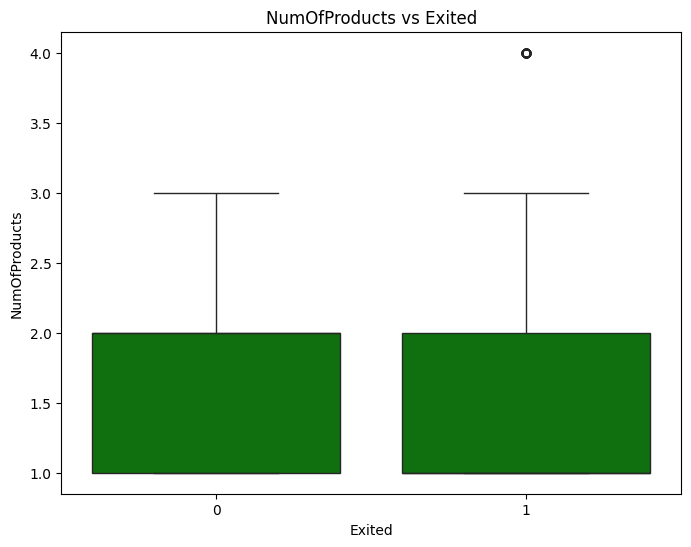

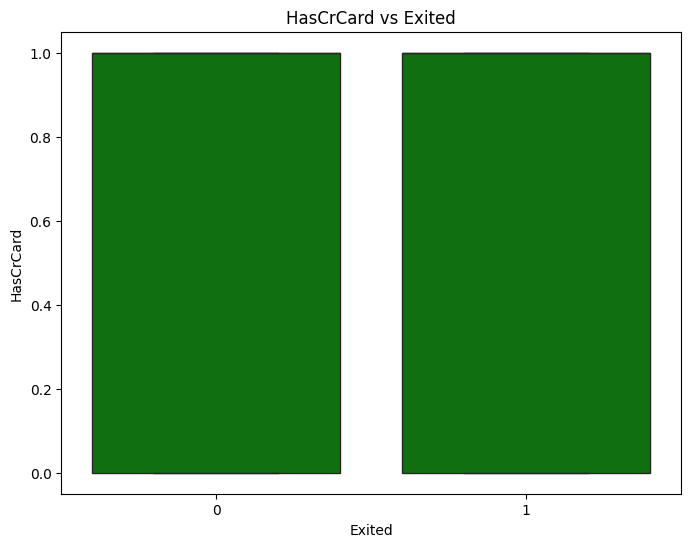

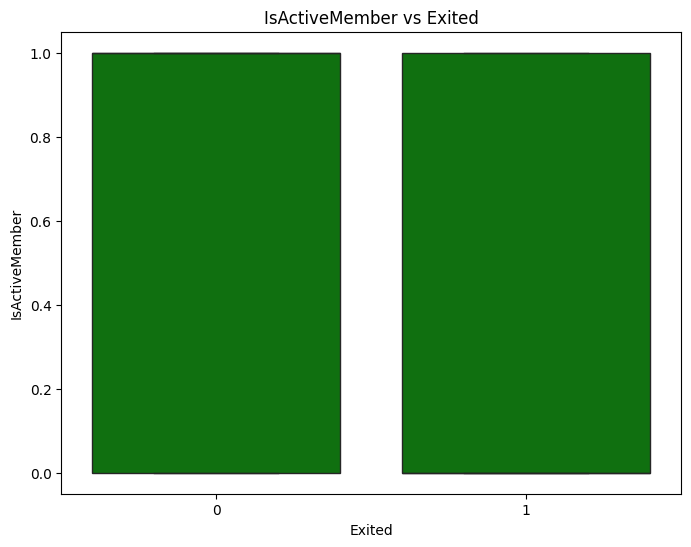

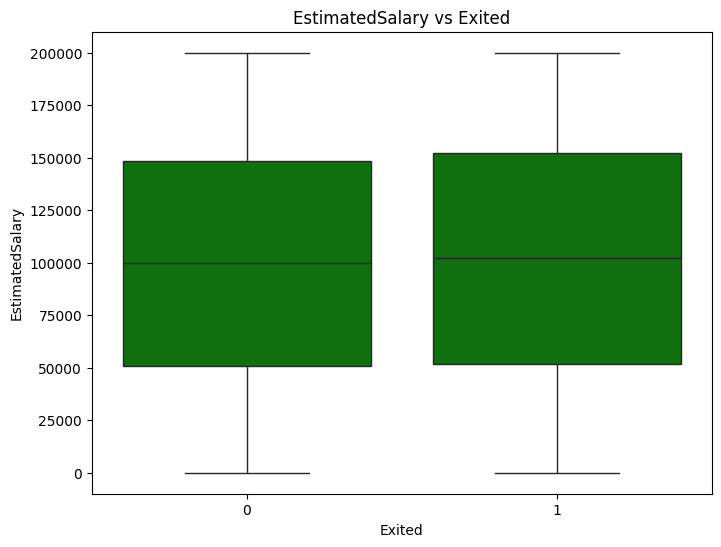

In [23]:
# Bivariate analysis. Numerical Vs Exited
numericals = data2.select_dtypes(include=['int64','float64']).columns.drop('Exited')


for colo in numericals:
  plt.figure(figsize=(8,6))
  sns.boxplot(data=data2, y=colo, x='Exited', color='g')
  plt.title(f"{colo} vs Exited")
  plt.xlabel("Exited");



## Observations

1. Customers ranging from ages 30-40 tend to be loyal to the bank unlike customers ranging from the age 40 - 50 having a higher likelihood of churning.
2. Customers having a tenure from 4-6 are loyal to the bank unlike customers with a wider spread of tenure have a higher rate of churning.
3. Customers with a slightly lower balance have a higher chance of staying in the bank.


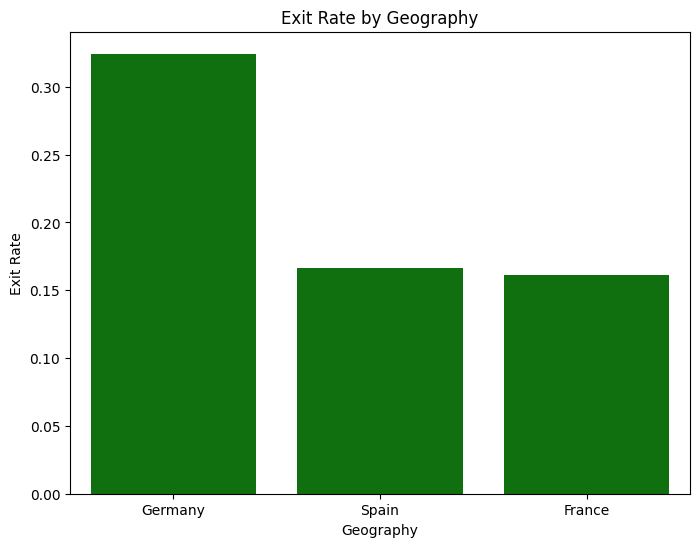

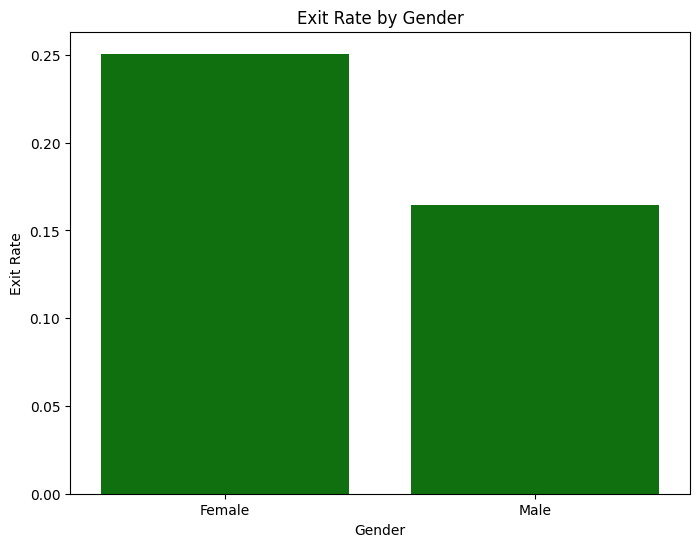

In [24]:
# categorical features vs defaulting
cat_feat = data2.select_dtypes(include='object').columns

for obj in cat_feat:
  plt.figure(figsize=(8,6))
  exit_rate = data2.groupby(obj)['Exited'].mean().sort_values(ascending=False)
  sns.barplot(y=exit_rate.values, x=exit_rate.index, errorbar=None, color='g')
  plt.title(f"Exit Rate by {obj}")
  plt.ylabel("Exit Rate");

In [25]:
!pip install geopandas

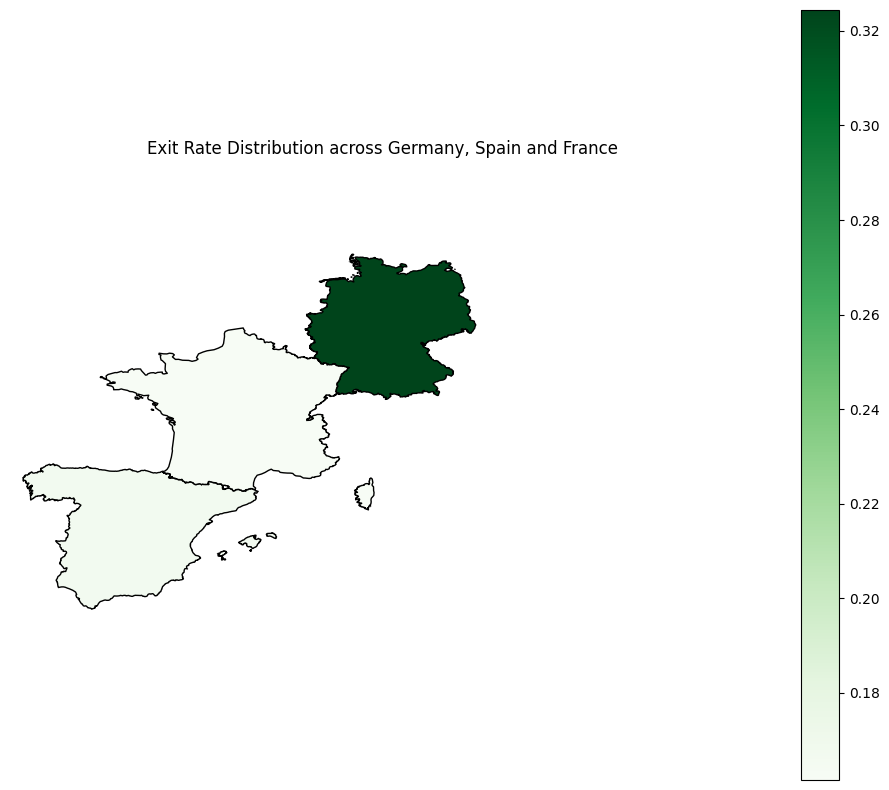

In [26]:
geo = data2.groupby("Geography")["Exited"].mean().reset_index()

import geopandas as gpd

# loading country level jsons
germany = gpd.read_file("/content/germany.json")
france = gpd.read_file("/content/france.json")
spain = gpd. read_file("/content/spain.json")

germany["Geography"] = "Germany"
france["Geography"] = "France"
spain["Geography"] = "Spain"

# merging and plotting
eu = pd.concat([germany, spain, france])


merged = eu.merge(geo,on="Geography")
fig, ax = plt.subplots(figsize=(12,10))
merged.plot(column='Exited', cmap='Greens', legend=True, edgecolor='black', ax=ax)


ax.set_xlim(-10, 30)
ax.set_ylim(35, 60)
plt.axis('off')
plt.title("Exit Rate Distribution across Germany, Spain and France");  # labelling is chaos!!!

## Observation

1. Germany has the highest exit rate compared to Spain and France.
2. Female customers have a higher rate of churning compared to male customers.

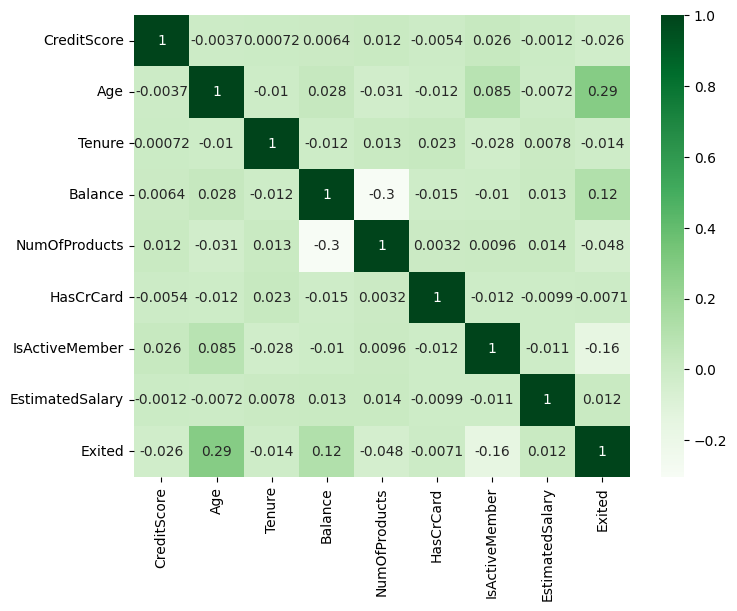

In [27]:
# multivariate analysis --> heatmap
df3 = data2.select_dtypes(include=['int64','float64'])
df4 = df3.corr()

plt.figure(figsize=(8,6))
sns.heatmap(df4, annot=True, cmap="Greens");



## Observations

1. Age has a strong positive correlation with Exited. Older customers have a higher likelihood of churning.
2. IsActiveMember has a strong negative correlation with Exited. More active members have a higher likelihood of being loyal customers.
3. HasCrCard has almost no correlation with customers churning which may not be a useful predictor.

# Preprocessing

In [29]:
data2.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5998,644,Spain,Male,28,0,0.00,2,1,0,119419.37,0
6770,662,France,Female,38,2,96479.81,1,1,0,120259.41,0
4568,584,Germany,Male,32,8,40172.91,1,1,1,137439.34,0


In [30]:
# using get_dummies
enc = pd.get_dummies(data2[['Geography', 'Gender']], drop_first=True, dtype=int)
enc.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [31]:
# merge the encoded data
data3 = pd.concat([data2, enc], axis=1)
data3.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [32]:
# dropping unwanted columns
data4 = data3.drop(['Geography', 'Gender'], axis=1)
data4.sample(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8574,717,59,4,0.00,2,1,1,170528.63,0,0,0,0
9746,490,41,0,139659.04,1,1,1,176254.12,0,1,0,0
1609,619,35,8,132292.63,1,1,0,65682.93,0,0,0,0
1797,647,44,4,93960.35,1,1,0,36579.53,1,1,0,1


In [33]:
# check shape
data4.shape

(10000, 12)

In [34]:
# Splitting the target from the features
X = data4.drop('Exited', axis=1)
y = data4['Exited']
X.shape, y.shape

((10000, 11), (10000,))

In [35]:
# Using train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
# checking shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [38]:
# scaling
scl = StandardScaler()
X_train_s = scl.fit_transform(X_train)
X_test_s = scl.transform(X_test)

# **Logistic Regression**

In [40]:
# initialise the model
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train_s, y_train)

LogisticRegression(class_weight='balanced')

In [41]:
# predict the model
ypred = model1.predict(X_test_s)
ypred[:5]

array([1, 0, 1, 1, 0])

In [42]:
# check accuracy score
print(f"The accuracy score is {accuracy_score(ypred, y_test)*100:.2f}%")

The accuracy score is 71.95%


In [43]:
modela =LogisticRegression()  # without class weights
modela.fit(X_train_s, y_train)
yrr = modela.predict(X_test_s)
print(f"The accuracy score is {accuracy_score(yrr, y_test)*100:.2f}%")

The accuracy score is 81.10%


In [46]:
# classification report

print(classification_report(y_test,ypred)) # model1
print(classification_report(y_test,yrr))  # modela

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Model 1 has a higher recall compared to modela. This implies that the model catches 71% of actual customers that churn compared to modela that only catches 20% of the actual customers that churn. F1-score is better in model1 than modela. Despite model1 having a lower precision(more false positives), it is a better model compared to modela.